In [1]:
MINIROCKET_PATH = 'evaluation/minirocket'
GNN_PATH = 'evaluation/gnn_minirocket'

# Carregando métricas

In [2]:
import json
from pathlib import Path
import pandas as pd

In [3]:
def load_metrics_from_folder(path: str) -> dict:
    path = Path(path)

    metrics = {
        'modelo': [],
        'accuracy': [],
        'macro_f1': []
    }

    for file in path.iterdir():

        with open(file, 'r') as f:
            curr_metrics = json.load(f)
        
        metrics['accuracy'].extend(curr_metrics['accuracy'])
        metrics['macro_f1'].extend(curr_metrics['macro_f1'])
        n_values = len(curr_metrics['macro_f1'])
        metrics['modelo'].extend([f"{file.parent.name.capitalize().replace('_', '-')} {file.stem.replace('_', ' ').capitalize()}"] * n_values)
        

    return metrics

In [4]:
multirocket_df = pd.DataFrame.from_dict(load_metrics_from_folder(MINIROCKET_PATH))
multirocket_df.head()

,modelo,accuracy,macro_f1
0,Minirocket Univariate useracceleration z,0.933333,0.920635
1,Minirocket Univariate useracceleration z,0.866667,0.855556
2,Minirocket Univariate useracceleration z,0.866667,0.853968
3,Minirocket Univariate useracceleration z,0.866667,0.876190
4,Minirocket Univariate useracceleration z,0.857143,0.861111


In [5]:
gnn_df = pd.DataFrame.from_dict(load_metrics_from_folder(GNN_PATH))
gnn_df.head()

,modelo,accuracy,macro_f1
0,Gnn-minirocket Univariate useracceleration z,0.866667,0.861111
1,Gnn-minirocket Univariate useracceleration z,0.600000,0.547619
2,Gnn-minirocket Univariate useracceleration z,0.933333,0.933333
3,Gnn-minirocket Univariate useracceleration z,0.866667,0.863492
4,Gnn-minirocket Univariate useracceleration z,0.857143,0.869444


In [6]:
metrics_df = pd.concat([multirocket_df, gnn_df], ignore_index=True)

In [7]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   modelo    80 non-null     object 
 1   accuracy  80 non-null     float64
 2   macro_f1  80 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [8]:
metrics_df.sort_values(by='modelo', inplace=True)

In [9]:
# renomeando variáveis
metrics_df['modelo'] = metrics_df['modelo'].str.replace('minirocket', 'MiniRocket')
metrics_df['modelo'] = metrics_df['modelo'].str.replace('Minirocket', 'MiniRocket')
metrics_df['modelo'] = metrics_df['modelo'].str.replace('Multivar', 'Multivariado')
metrics_df['modelo'] = metrics_df['modelo'].str.replace('Univariate', 'Univariado')
metrics_df['modelo'] = metrics_df['modelo'].str.replace('useracceleration', ' - Aceleração no eixo ')

# Visualizando métricas

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

<Axes: xlabel='accuracy', ylabel='modelo'>

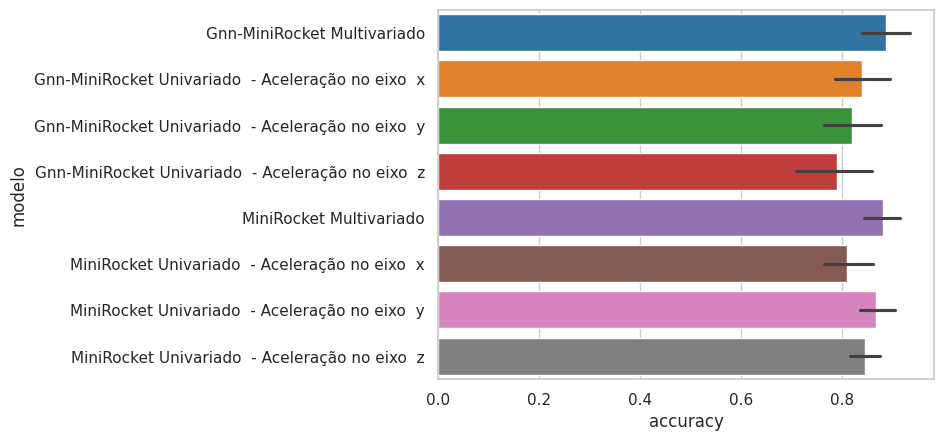

In [11]:
sns.barplot(data=metrics_df, y='modelo', hue='modelo', x='accuracy', palette='tab10', legend=False)

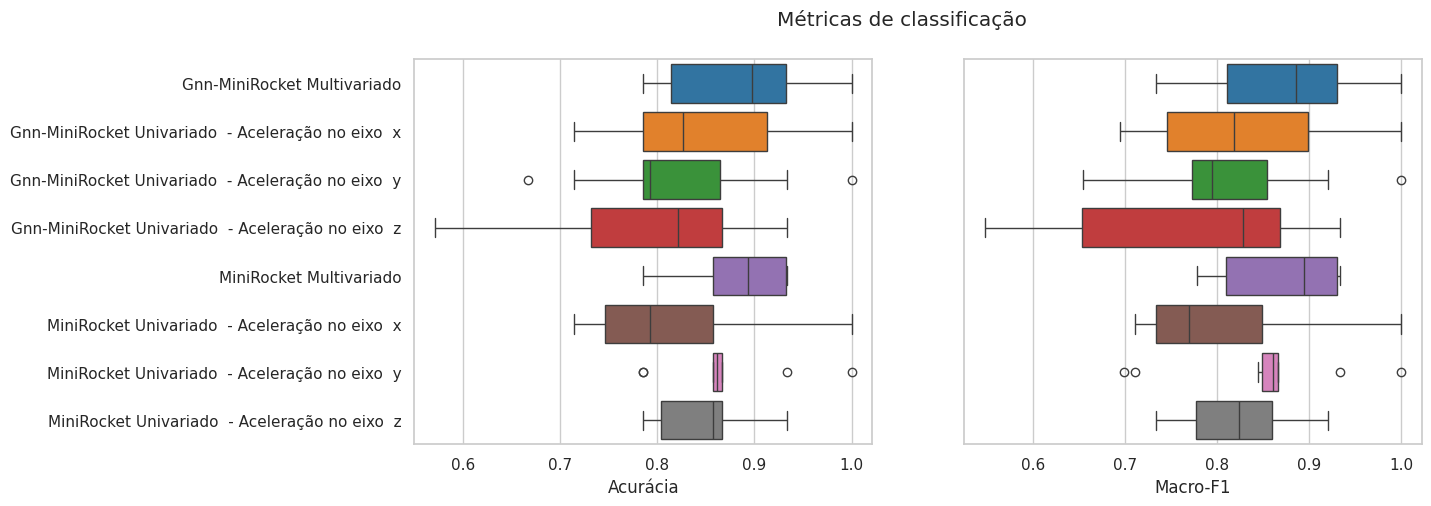

In [12]:
plt.figure(figsize=(13,5))
plt.suptitle('Métricas de classificação')
plt.subplot(121)
axes = sns.boxplot(data=metrics_df, y='modelo', hue='modelo', x='accuracy', palette='tab10', legend=False)
axes.set_ylabel('')
axes.set_xlabel('Acurácia')

plt.subplot(122)
axes = sns.boxplot(data=metrics_df, y='modelo', hue='modelo', x='macro_f1', palette='tab10', legend=False)
axes.set_ylabel('')
axes.set_yticklabels('')
axes.set_xlabel('Macro-F1')

plt.savefig('data/figures/metricas_classif.pdf', bbox_inches='tight')

In [13]:
metrics_df.groupby(by='modelo').describe()

accuracy            \
                                                      count      mean   
modelo                                                                  
Gnn-MiniRocket Multivariado                            10.0  0.888571   
Gnn-MiniRocket Univariado  - Aceleração no eixo  x     10.0  0.840000   
Gnn-MiniRocket Univariado  - Aceleração no eixo  y     10.0  0.819524   
Gnn-MiniRocket Univariado  - Aceleração no eixo  z     10.0  0.790952   
MiniRocket Multivariado                                10.0  0.881429   
MiniRocket Univariado  - Aceleração no eixo  x         10.0  0.811429   
MiniRocket Univariado  - Aceleração no eixo  y         10.0  0.867619   
MiniRocket Univariado  - Aceleração no eixo  z         10.0  0.846190   

                                                                        \
                                                         std       min   
modelo                                                                   
Gnn-MiniRocket Multivariado                         0.081995  0.785714   
Gnn-MiniRocket Univariado  - Aceleração no eixo  x  0.094045  0.714286   
Gnn-MiniRocket Univariado  - Aceleração no eixo  y  0.098552  0.666667   
Gnn-MiniRocket Univariado  - Aceleração no eixo  z  0.127211  0.571429   
MiniRocket Multivariado                             0.057820  0.785714   
MiniRocket Univariado  - Aceleração no eixo  x      0.087696  0.714286   
MiniRocket Univariado  - Aceleração no eixo  y      0.062886  0.785714   
MiniRocket Univariado  - Aceleração no eixo  z      0.047356  0.785714   

                                                                        \
                                                         25%       50%   
modelo                                                                   
Gnn-MiniRocket Multivariado                         0.814286  0.897619   
Gnn-MiniRocket Univariado  - Aceleração no eixo  x  0.785714  0.826190   
Gnn-MiniRocket Univariado  - Aceleração no eixo  y  0.785714  0.792857   
Gnn-MiniRocket Univariado  - Aceleração no eixo  z  0.732143  0.821429   
MiniRocket Multivariado                             0.857143  0.892857   
MiniRocket Univariado  - Aceleração no eixo  x      0.746429  0.792857   
MiniRocket Univariado  - Aceleração no eixo  y      0.857143  0.861905   
MiniRocket Univariado  - Aceleração no eixo  z      0.803571  0.857143   

                                                                        \
                                                         75%       max   
modelo                                                                   
Gnn-MiniRocket Multivariado                         0.932143  1.000000   
Gnn-MiniRocket Univariado  - Aceleração no eixo  x  0.913095  1.000000   
Gnn-MiniRocket Univariado  - Aceleração no eixo  y  0.864286  1.000000   
Gnn-MiniRocket Univariado  - Aceleração no eixo  z  0.866667  0.933333   
MiniRocket Multivariado                             0.932143  0.933333   
MiniRocket Univariado  - Aceleração no eixo  x      0.857143  1.000000   
MiniRocket Univariado  - Aceleração no eixo  y      0.866667  1.000000   
MiniRocket Univariado  - Aceleração no eixo  z      0.866667  0.933333   

                                                   macro_f1            \
                                                      count      mean   
modelo                                                                  
Gnn-MiniRocket Multivariado                            10.0  0.879841   
Gnn-MiniRocket Univariado  - Aceleração no eixo  x     10.0  0.827540   
Gnn-MiniRocket Univariado  - Aceleração no eixo  y     10.0  0.807698   
Gnn-MiniRocket Univariado  - Aceleração no eixo  z     10.0  0.770833   
MiniRocket Multivariado                                10.0  0.871746   
MiniRocket Univariado  - Aceleração no eixo  x         10.0  0.798294   
MiniRocket Univariado  - Aceleração no eixo  y         10.0  0.850397   
MiniRocket Univariado  - Aceleração no eixo  z         10.0  0.821984   

# Comparando vitórias e perdas

In [67]:
def plot_pair_metrics(df: pd.DataFrame, metric: str, title: str, min_value: float = 0.75) -> None:

    plt.plot([min_value, 1], [min_value, 1], color='r', linestyle='--')
    for gnn_acc, mr_acc in zip(df[df['modelo'] == 'Gnn-MiniRocket Multivariado'][metric], \
                                df[df['modelo'] == 'MiniRocket Multivariado'][metric]):
        if gnn_acc > mr_acc:
            plt.scatter(mr_acc, gnn_acc, color='red')
        else:
            plt.scatter(mr_acc, gnn_acc, color='green')

    plt.title(title)
    plt.xlabel('MiniRocket Multivariado')
    plt.ylabel('Gnn-MiniRocket Multivariado')

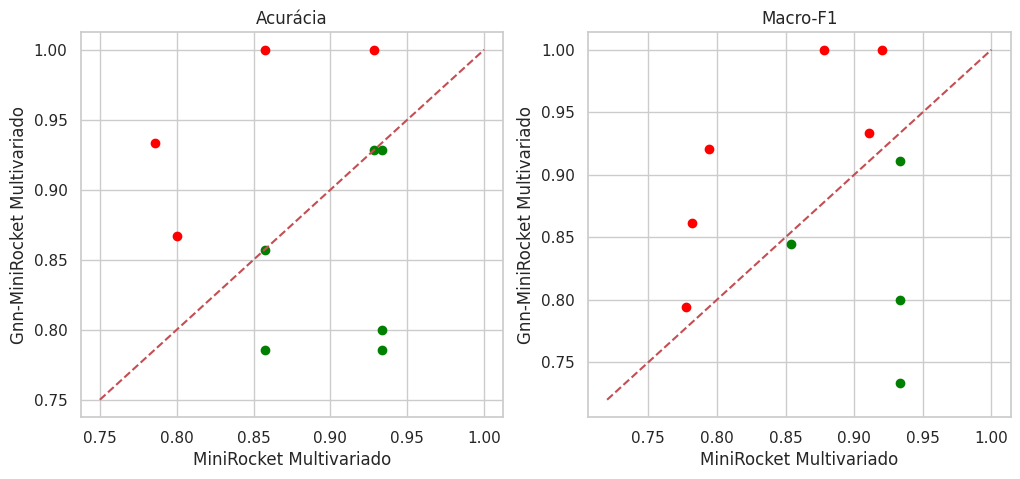

In [69]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_pair_metrics(metrics_df, 'accuracy', 'Acurácia')
plt.subplot(122)
plot_pair_metrics(metrics_df, 'macro_f1', 'Macro-F1', min_value=0.72)